<a href="https://colab.research.google.com/github/bijivemulasumanthkumarreddy/MACHINE-LEARNING-/blob/main/ML_assignment_1_Spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# NAME : BIJIVEMULA SUMANTH KUMAR REDDY
# ROLL NO : 21691A32B3
# DEPARTMENT OF DATA SCIENCE
# MACHINE LEARNING ASSIGNMENT-1
# QUESTION NUMBER : 2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/spam_ham_dataset.csv")
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
x= df['text']
y= df["label_num"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_train_vec= vectorizer.fit_transform(x_train)
X_test_vec = vectorizer.transform(x_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
naive_model = MultinomialNB()
naive_model.fit(X_train_vec, y_train)
y_pred = naive_model.predict(X_test_vec)

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9764705882352941


In [ ]:
print('Classification Report:')
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1030
           1       0.96      0.96      0.96       415

    accuracy                           0.98      1445
   macro avg       0.97      0.97      0.97      1445
weighted avg       0.98      0.98      0.98      1445



In [ ]:
from sklearn import metrics
cn_mtx=metrics.confusion_matrix(y_test,y_pred)
cn_mtx

array([[1014,   16],
       [  18,  397]])

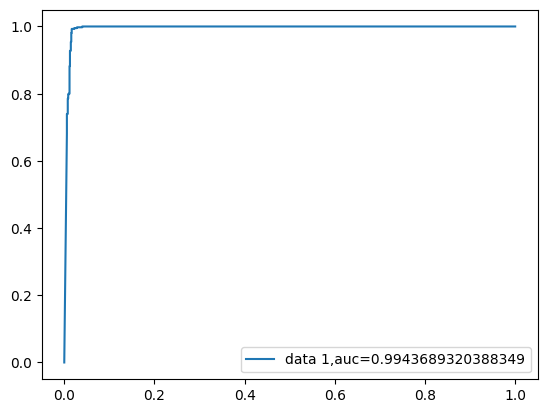

In [ ]:
y_pred_proba=naive_model.predict_proba(X_test_vec)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test,y_pred_proba)
auc=metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label="data 1,auc="+str(auc))
plt.legend(loc=4)
plt.show()